##Importing all the libraries

In [102]:
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, render_template, request
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from scipy.stats import zscore

# from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [103]:
def posix_time(dt):
    return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)



#importing the dataset




In [104]:
data = pd.read_csv('traffic_volume_data.csv')

#taking the required features or columns
Collecting the data


In [107]:
data = data.sort_values(
    by=['date_time'], ascending=True).reset_index(drop=True)
last_n_hours = [1, 2, 3, 4, 5, 6]
for n in last_n_hours:
    data[f'last_{n}_hour_traffic'] = data['traffic'].shift(n)

data.loc[data['is_holiday'] != 'None', 'is_holiday'] = 1
data.loc[data['is_holiday'] == 'None', 'is_holiday'] = 0
data['is_holiday'] = data['is_holiday'].astype(int)

# data['date_time'] = pd.to_datetime(data['date_time'])
data['date_time'] = pd.to_datetime(data['date_time'], format="%d/%m/%Y %H:%M:%S")
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))
data.to_csv("traffic_volume_data.csv", index=None)

In [108]:
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
data = pd.read_csv("traffic_volume_data.csv")
data = data.sample(700).reset_index(drop=True)
label_columns = ['source', 'destination','route']
numeric_columns = ['is_holiday', 
                       'weekday', 'hour', 'day', 'year', 'month']

In [109]:
features = numeric_columns+label_columns
X = data[features]
X.head()

,is_holiday,weekday,hour,day,year,month,source,destination,route
0,1,1,19,25,2022,7,wagholi,nigadi,Khadaki
1,1,3,4,25,2022,5,wagholi,nigadi,Lohgaon Rd
2,1,3,13,23,2022,2,wagholi,nigadi,Lohgaon Rd
3,1,4,19,6,2022,1,wagholi,nigadi,Khadaki
4,1,5,23,4,2022,2,wagholi,nigadi,Khadaki


In [68]:
X.shape


(700, 9)

In [110]:
from functools import reduce
def unique(list1):
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

n1 = data['source']
n2 = data['destination']
n3 = data['route']
unique(n1)
unique(n2)
unique(n3)
n1features = ['wagholi','nigadi']
n2features = ['nigdi','wagholi']
n3features = ['Khadki','lohgaon road']
"""#Data Preparation"""

n11 = []
n22 = []
n33 = []
for i in range(700):
    if(n1[i]) not in n1features:
        n11.append(0)
    else:
        n11.append((n1features.index(n1[i]))+1)
    if n2[i] not in n2features:
        n22.append(0)
    else:
        n22.append((n2features.index(n2[i]))+1)
    if n3[i] not in n3features:
        n33.append(0)
    else:
        n33.append((n3features.index(n3[i]))+1)
# print(n11)
# print(n22)
data['source'] = n11
data['destination'] = n22
data['route'] = n33


['wagholi']
['nigadi']
['Khadaki', 'Lohgaon Rd']


#Data Preparation

In [111]:
features = numeric_columns+label_columns
target = ['traffic']
X = data[features]
y = data[target]

In [112]:
X.head(6)

,is_holiday,weekday,hour,day,year,month,source,destination,route
0,1,1,19,25,2022,7,1,0,0
1,1,3,4,25,2022,5,1,0,0
2,1,3,13,23,2022,2,1,0,0
3,1,4,19,6,2022,1,1,0,0
4,1,5,23,4,2022,2,1,0,0
5,1,6,5,24,2022,9,1,0,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

[[<Axes: title={'center': 'is_holiday'}>
  <Axes: title={'center': 'weekday'}> <Axes: title={'center': 'hour'}>]
 [<Axes: title={'center': 'day'}> <Axes: title={'center': 'year'}>
  <Axes: title={'center': 'month'}>]
 [<Axes: title={'center': 'source'}>
  <Axes: title={'center': 'destination'}>
  <Axes: title={'center': 'route'}>]]


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

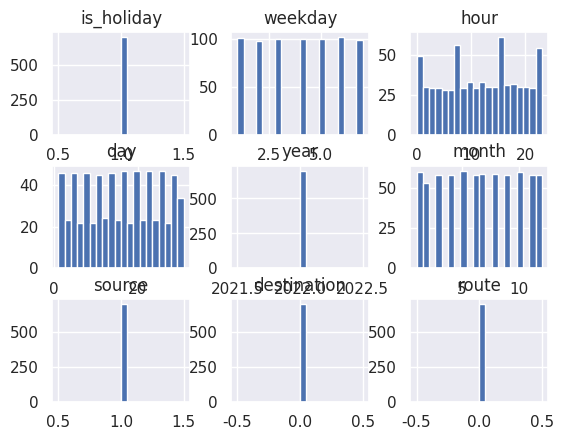

In [113]:
print(data[features].hist(bins=20,))

In [114]:
#data['traffic'].hist(bins=20)

#Feature Scaling

In [115]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y).flatten()
warnings.filterwarnings('ignore')

In [116]:
print(X[:5])

[[0.         0.         0.82608696 0.8        0.         0.54545455
  0.         0.         0.        ]
 [0.         0.33333333 0.17391304 0.8        0.         0.36363636
  0.         0.         0.        ]
 [0.         0.33333333 0.56521739 0.73333333 0.         0.09090909
  0.         0.         0.        ]
 [0.         0.5        0.82608696 0.16666667 0.         0.
  0.         0.         0.        ]
 [0.         0.66666667 1.         0.1        0.         0.09090909
  0.         0.         0.        ]]


#Visualization

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

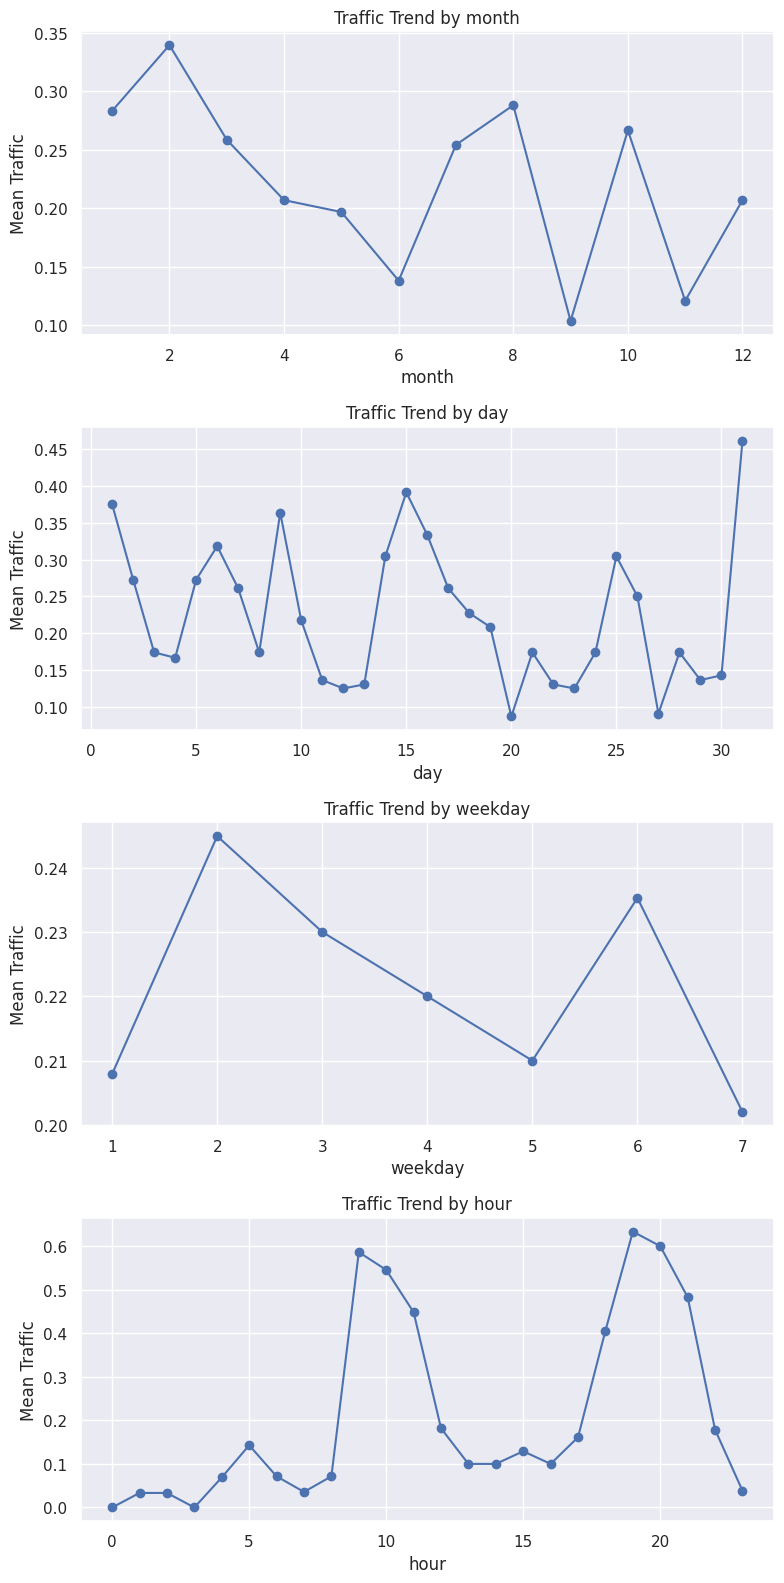

In [117]:
metrics = ['month', 'day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

#Train the Model

In [118]:
regr = MLPRegressor(random_state=1, max_iter=50).fit(X, y)
new = []
print('predicted output :=',regr.predict(X[:10]))
print('Actual output :=',y[:10])

predicted output := [0.25579404 0.12171318 0.26066182 0.43753935 0.49550674 0.0818092
 0.22002627 0.11443229 0.0375626  0.15381621]
Actual output := [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [119]:
# error eval
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
y_pred = regr.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))
##############################

Mean Absolute Error: 0.32988252318180894


In [120]:
print(features)

['is_holiday', 'weekday', 'hour', 'day', 'year', 'month', 'source', 'destination', 'route']


In [121]:
data[features].head(5)

,is_holiday,weekday,hour,day,year,month,source,destination,route
0,1,1,19,25,2022,7,1,0,0
1,1,3,4,25,2022,5,1,0,0
2,1,3,13,23,2022,2,1,0,0
3,1,4,19,6,2022,1,1,0,0
4,1,5,23,4,2022,2,1,0,0


#User input

In [132]:
ip=[0,1,10,25,2022,12,1,1,1]#isholiday,weekday,hour,day,month,source,destination,route
ip = x_scaler.transform([ip])
out=regr.predict(ip)
print('Before inverse Scaling :',out)

Before inverse Scaling : [-0.0651815]


In [133]:
y_pred = y_scaler.inverse_transform([out])
print('Traffic prediction: ',y_pred)

Traffic prediction:  [[-0.0651815]]


In [134]:
if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")

No Traffic 


#Evaluating Metrics 

In [128]:
# def relative_absolute_error(true, pred):
#     true_mean = np.mean(true)
#     squared_error_num = np.sum(np.abs(true - pred))
#     squared_error_den = np.sum(np.abs(true - true_mean))
#     rae_loss = squared_error_num / squared_error_den
#     return rae_loss
# def mean_bias_error(true, pred):
#     bias_error = true - pred
#     mbe_loss = np.mean(np.sum(diff) / true.size)
#     return mbe_loss
# def mean_absolute_percentage_error(true, pred):
#     abs_error = (np.abs(true - pred)) / true
#     sum_abs_error = np.sum(abs_error)
#     mape_loss = (sum_abs_error / true.size) * 100
#     return mape_loss
# def mean_squared_error(true, pred):
#     squared_error = np.square(true - pred) 
#     sum_squared_error = np.sum(squared_error)
#     mse_loss = sum_squared_error / true.size
#     return mse_loss
# def root_mean_squared_error(true, pred):
#     squared_error = np.square(true - pred) 
#     sum_squared_error = np.sum(squared_error)
#     rmse_loss = np.sqrt(sum_squared_error / true.size)
#     return rmse_loss